In [20]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score, precision_score, f1_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns
path="C:/Users/owner/Downloads/fraudTrain.csv"
df=pd.read_csv(path,header=0)
print(df.head())
temp=df['trans_date_trans_time']

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [2]:
print(df.is_fraud.value_counts())
print(df.isna().sum())
df['year']=pd.to_datetime(df['trans_date_trans_time']).dt.year
df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month
df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
df=df.drop('trans_date_trans_time',axis=1)
df=df.drop('Unnamed: 0',axis=1)
print(df.head())

0    1289169
1       7506
Name: is_fraud, dtype: int64
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
             cc_num                            merchant       category  \
0  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   
1      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos   
2    38859492057661                fraud_Lind-Buckridge  entertainment   
3  353409376434

In [3]:
df.info()
df['gender']=df['gender'].replace({'F':1,'M':0})
df['gender'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   cc_num      1296675 non-null  int64  
 1   merchant    1296675 non-null  object 
 2   category    1296675 non-null  object 
 3   amt         1296675 non-null  float64
 4   first       1296675 non-null  object 
 5   last        1296675 non-null  object 
 6   gender      1296675 non-null  object 
 7   street      1296675 non-null  object 
 8   city        1296675 non-null  object 
 9   state       1296675 non-null  object 
 10  zip         1296675 non-null  int64  
 11  lat         1296675 non-null  float64
 12  long        1296675 non-null  float64
 13  city_pop    1296675 non-null  int64  
 14  job         1296675 non-null  object 
 15  dob         1296675 non-null  object 
 16  trans_num   1296675 non-null  object 
 17  unix_time   1296675 non-null  int64  
 18  merch_lat   1296675 no

array([1, 0], dtype=int64)

In [4]:
df1=df[['cc_num','first','last','street','trans_num','unix_time','merch_lat','merch_long','zip','lat','long','city']]
df=df.drop(df1,axis=1)
print(df)

                                    merchant       category     amt  gender  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97       1   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23       1   
2                       fraud_Lind-Buckridge  entertainment  220.11       0   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00       0   
4                        fraud_Keeling-Crist       misc_pos   41.96       0   
...                                      ...            ...     ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56       0   
1296671             fraud_Abernathy and Sons    food_dining   51.70       0   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93       0   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90       0   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30       0   

        state  city_pop                            

In [5]:
df.describe()
df.set_index("gender").sort_index()

,merchant,category,amt,state,city_pop,job,dob,is_fraud,year,month,hour
gender,,,,,,,,,,,
0,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,MT,218,"Therapist, horticultural",1995-08-16,0,2020,6,12
0,"fraud_Huel, Hammes and Witting",grocery_pos,55.10,CA,757530,Magazine features editor,1979-04-30,0,2019,8,9
0,fraud_Hamill-Daugherty,misc_net,1.31,IL,92294,Claims inspector/assessor,1969-05-01,0,2020,2,9
0,"fraud_Willms, Kris and Bergnaum",shopping_pos,9.56,ID,129,Cartographer,1965-12-15,0,2020,2,9
0,fraud_Stoltenberg-Beatty,shopping_pos,265.61,AK,145,"Administrator, education",1939-11-09,0,2019,8,9
...,...,...,...,...,...,...,...,...,...,...,...
1,"fraud_Heathcote, Yost and Kertzmann",shopping_net,2.85,IN,350,Counsellor,1955-01-05,0,2019,8,8
1,"fraud_Schumm, Bauch and Ondricka",grocery_pos,198.32,TX,46563,Systems developer,1970-09-11,0,2019,8,8
1,"fraud_Goldner, Kovacek and Abbott",grocery_pos,71.90,MI,765,Immunologist,1972-06-12,0,2019,8,8


['misc_net' 'grocery_pos' 'entertainment' 'gas_transport' 'misc_pos'
 'grocery_net' 'shopping_net' 'shopping_pos' 'food_dining' 'personal_care'
 'health_fitness' 'travel' 'kids_pets' 'home']


<Axes: xlabel='category', ylabel='is_fraud'>

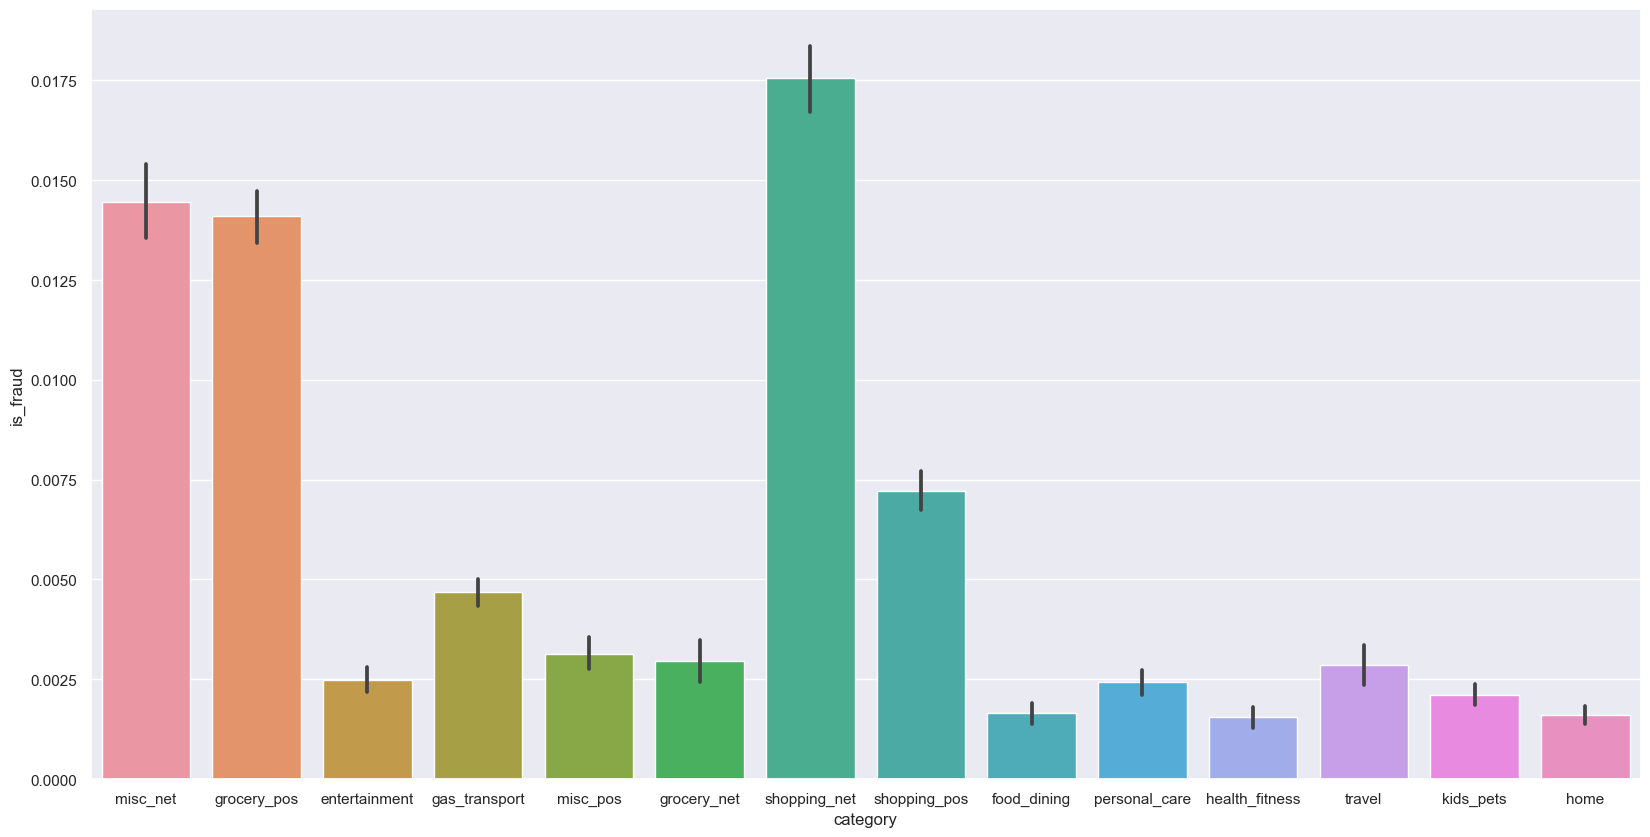

In [6]:
print(df['category'].unique())
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(data=df,x='category',y='is_fraud')

['NC' 'WA' 'ID' 'MT' 'VA' 'PA' 'KS' 'TN' 'IA' 'WV' 'FL' 'CA' 'NM' 'NJ'
 'OK' 'IN' 'MA' 'TX' 'WI' 'MI' 'WY' 'HI' 'NE' 'OR' 'LA' 'DC' 'KY' 'NY'
 'MS' 'UT' 'AL' 'AR' 'MD' 'GA' 'ME' 'AZ' 'MN' 'OH' 'CO' 'VT' 'MO' 'SC'
 'NV' 'IL' 'NH' 'SD' 'AK' 'ND' 'CT' 'RI' 'DE']


<Axes: xlabel='state', ylabel='is_fraud'>

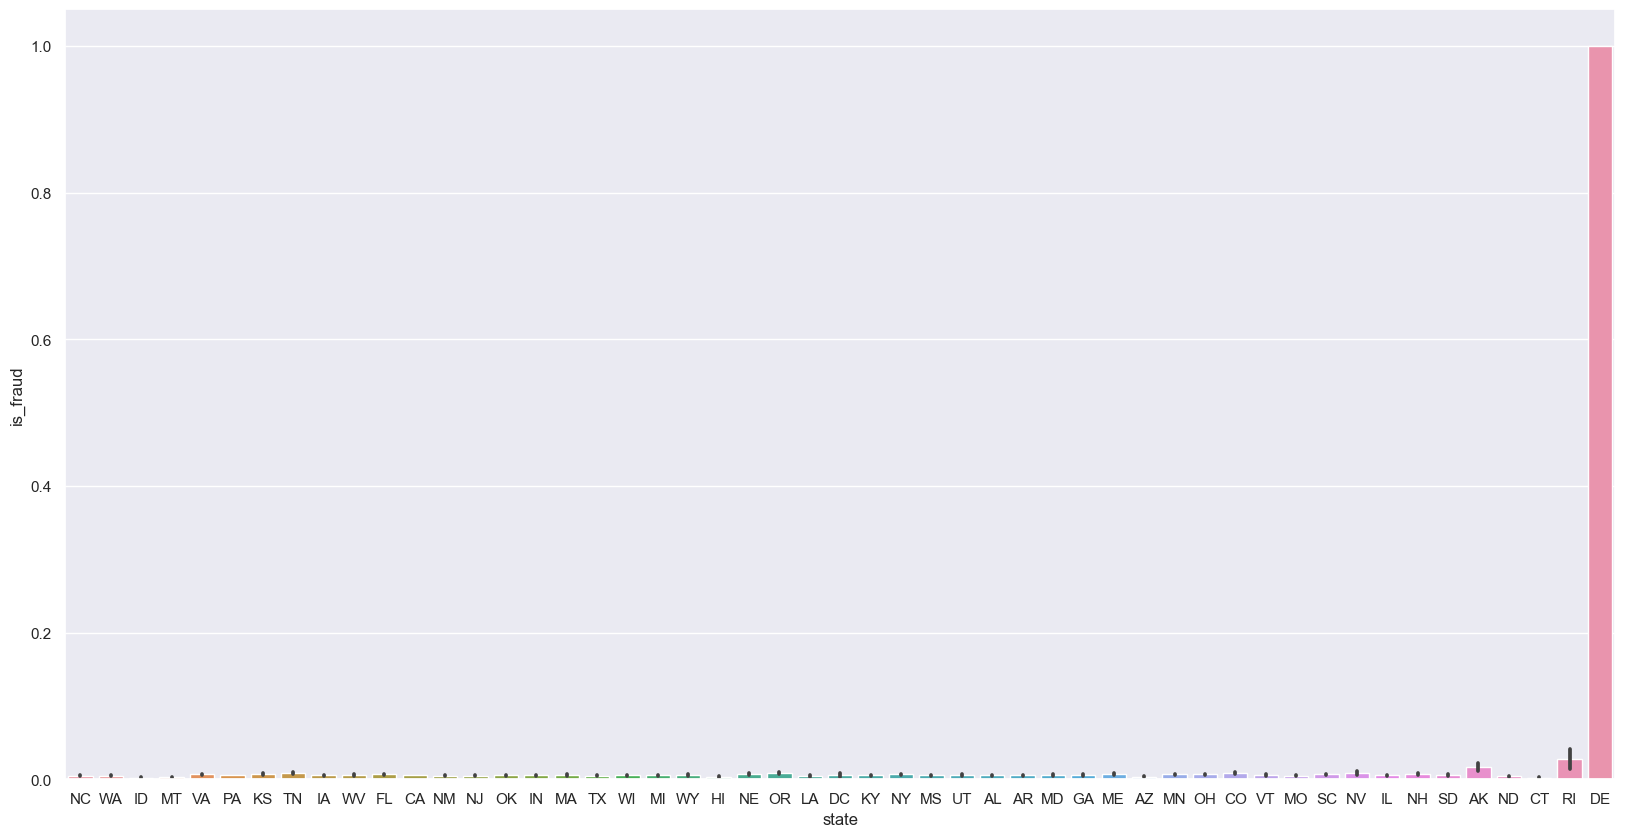

In [7]:
print(df['state'].unique())
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(data=df,x='state',y='is_fraud')

<Axes: xlabel='hour', ylabel='is_fraud'>

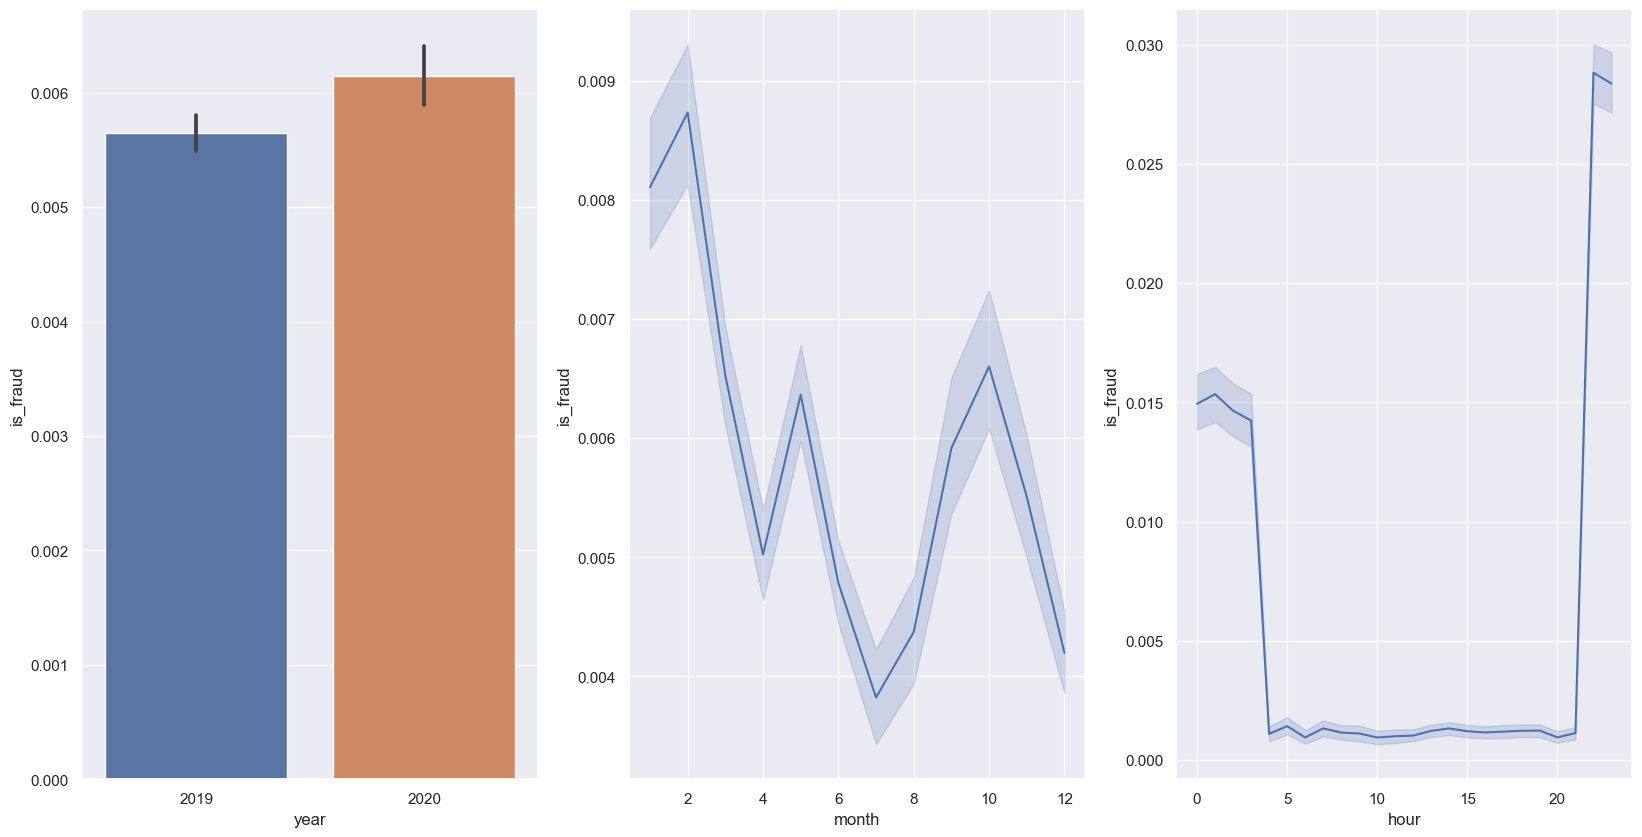

In [8]:
fig,axes=plt.subplots(1,3)
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(data=df,x='year',y='is_fraud',ax=axes[0])
sns.lineplot(data=df,x='month',y='is_fraud',ax=axes[1])
sns.lineplot(data=df,x='hour',y='is_fraud',ax=axes[2])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 12 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   merchant  1296675 non-null  object 
 1   category  1296675 non-null  object 
 2   amt       1296675 non-null  float64
 3   gender    1296675 non-null  int64  
 4   state     1296675 non-null  object 
 5   city_pop  1296675 non-null  int64  
 6   job       1296675 non-null  object 
 7   dob       1296675 non-null  object 
 8   is_fraud  1296675 non-null  int64  
 9   year      1296675 non-null  int64  
 10  month     1296675 non-null  int64  
 11  hour      1296675 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 118.7+ MB


In [10]:
le=LabelEncoder()
df['merchant']=le.fit_transform(df['merchant'])
df['category']=le.fit_transform(df['category'])
df['job']=le.fit_transform(df['job'])
df['dob']=le.fit_transform(df['dob'])
df['state']=le.fit_transform(df['state'])

In [15]:
y_target=df.iloc[:,8]
x_features=df.iloc[:,[i for i in range(12) if i != 8]]
print(y_target)
print(x_features)

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64
         merchant  category     amt  gender  state  city_pop  job  dob  year  \
0             514         8    4.97       1     27      3495  370  779  2019   
1             241         4  107.23       1     47       149  428  607  2019   
2             390         0  220.11       0     13      4154  307  302  2019   
3             360         2   45.00       0     26      1939  328  397  2019   
4             297         9   41.96       0     45        99  116  734  2019   
...           ...       ...     ...     ...    ...       ...  ...  ...   ...   
1296670       499         0   15.56       0     44       258  215  298  2020   
1296671         2         1   51.70       0     20       100  360  630  2020   
1296672       599         1  105.93       0     32       899  308  412  2020   
1296673    

In [16]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_features, y_target, test_size = 0.3)
print(x_training_data, x_test_data, y_training_data, y_test_data)

        merchant  category     amt  gender  state  city_pop  job  dob  year  \
863175        87         4   69.54       0      1    493806  306  636  2019   
162987        39         7   63.48       0     14      1512   94  961  2019   
394849       362         6   14.50       0     36    640470   13  387  2019   
683641       130         4  191.69       1     34     34496  271  469  2019   
709362       643         7   68.50       0     33    214518   64  267  2019   
...          ...       ...     ...     ...    ...       ...  ...  ...   ...   
28316        638         9    7.56       0     34     11250  269  599  2019   
145099       434         8   18.19       1     25     19685  196  708  2019   
298838       324         3   88.76       1     15    910148  197  565  2019   
672948       628         5   37.25       1     34       207  119  318  2019   
266776       155         6   25.82       1     29      1745  155  532  2019   

        month  hour  
863175     12     7  
162987 

In [17]:
model=LogisticRegression()
model.fit(x_training_data,y_training_data)
y=model.predict(x_test_data)
print(y)

[0 0 0 ... 0 0 0]


In [18]:
print('Recall Score: ', recall_score(y_test_data, y))
print('Precision: ', precision_score(y_test_data, y))
print('F1-Score: ', f1_score(y_test_data, y))
print('Accuracy Score: ', accuracy_score(y_test_data, y))

# Calculate and display AUC score
auc_score = roc_auc_score(y_test_data, y)
print('AUC Score: ', auc_score)

Recall Score:  0.0
Precision:  0.0
F1-Score:  0.0
Accuracy Score:  0.993565602321833
AUC Score:  0.4997129721091637


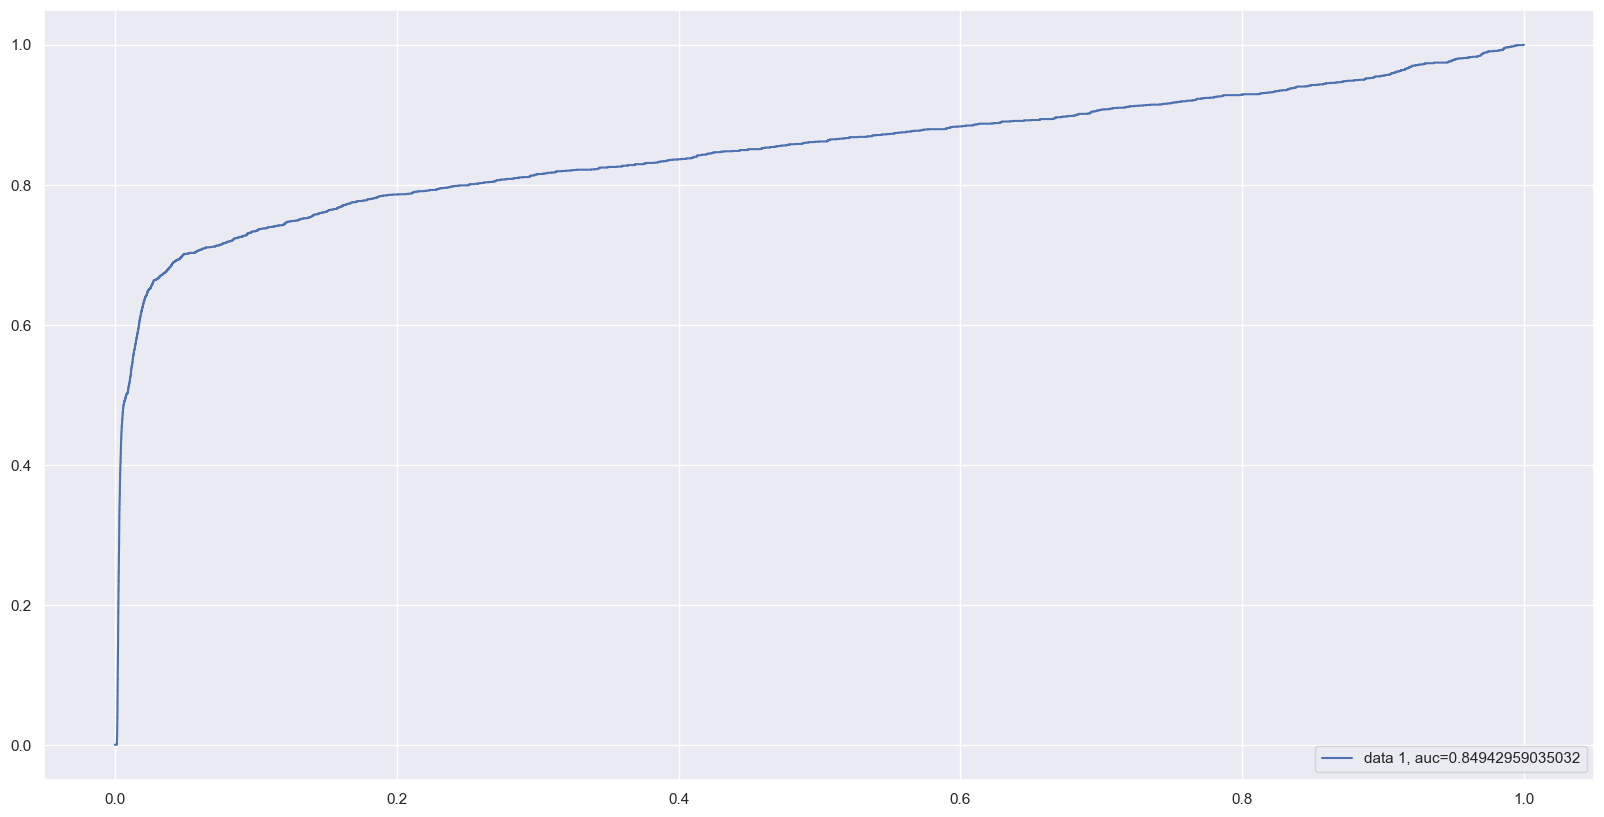

In [21]:
y_pred_proba = model.predict_proba(x_test_data)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_data,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_data, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

0.993565602321833


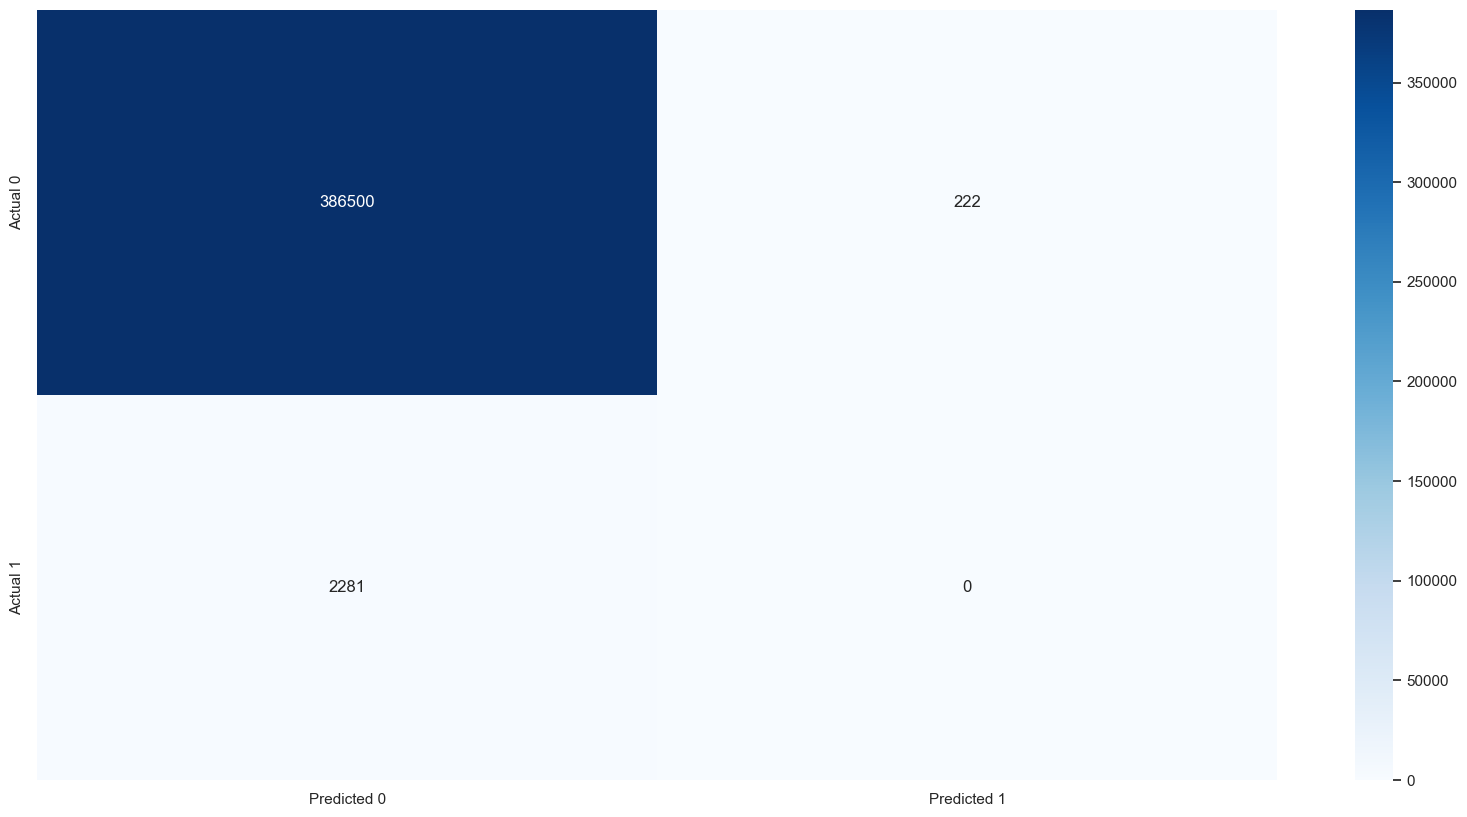

In [22]:
cm = confusion_matrix(y_test_data,y)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
print(accuracy_score(y_test_data, y))

In [24]:
model1=RandomForestClassifier(random_state=42)
model1.fit(x_training_data,y_training_data)
y1=model1.predict(x_test_data)
y1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
feature_imp=model1.feature_importances_
fea_imp=pd.DataFrame({'features':x_training_data.columns,'Importance':feature_imp})
fea_imp.sort_values('Importance',ascending=False)
print('Recall Score: ', recall_score(y_test_data, y1))
print('Precision: ', precision_score(y_test_data, y1))
print('F1-Score: ', f1_score(y_test_data, y1))
print('Accuracy Score: ', accuracy_score(y_test_data, y1))

# Calculate and display AUC score
auc_score = roc_auc_score(y_test_data, y1)
print('AUC Score: ', auc_score)

Recall Score:  0.7777290661990355
Precision:  0.9709906951286261
F1-Score:  0.863680623174294
Accuracy Score:  0.9985604224131948
AUC Score:  0.8887960084228766


In [29]:
acc=accuracy_score(y_test_data,y1)
acc

0.9985604224131948

0.9985604224131948


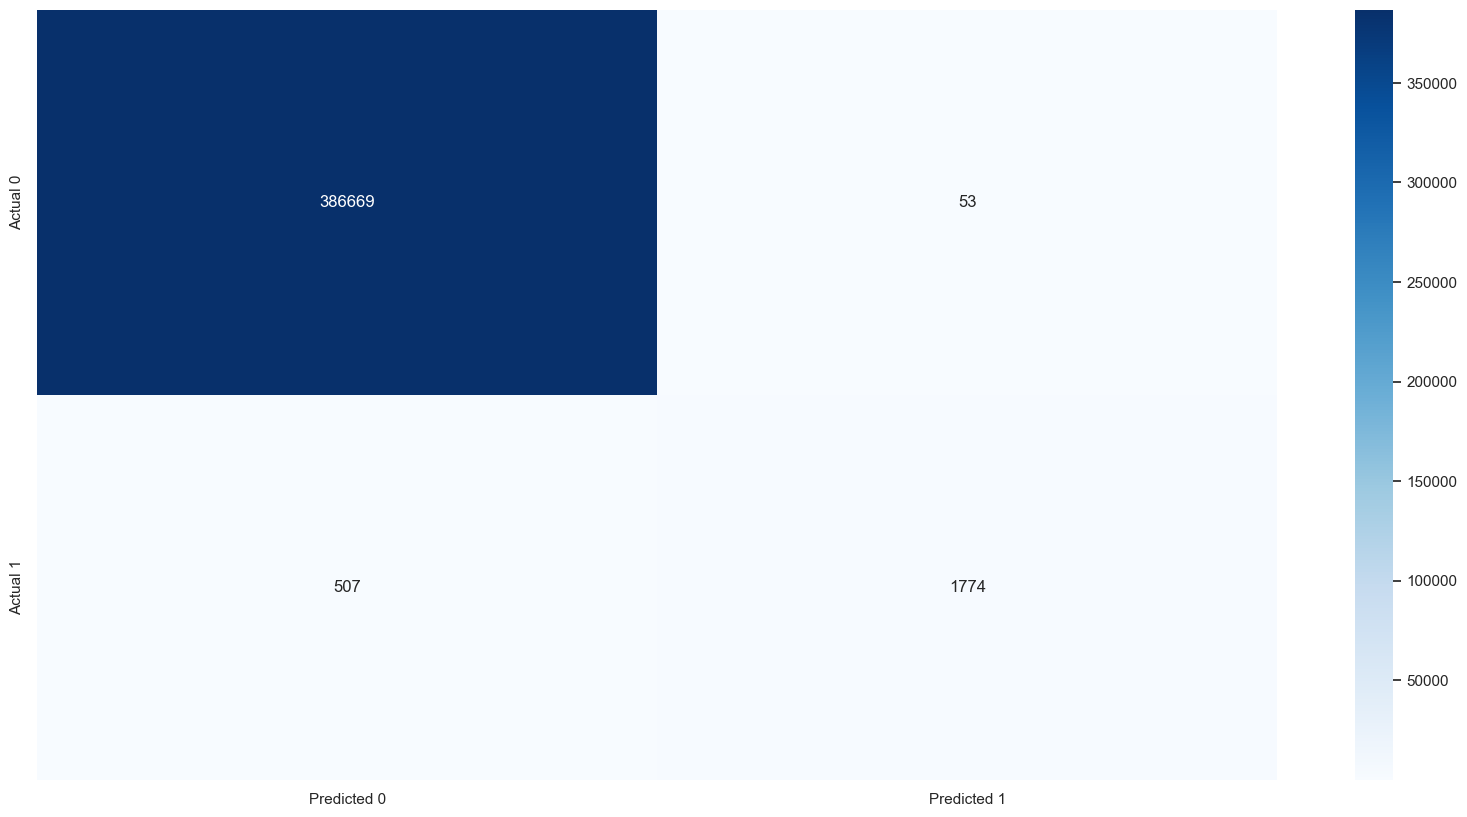

In [31]:
cm = confusion_matrix(y_test_data,y1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
print(accuracy_score(y_test_data, y1))

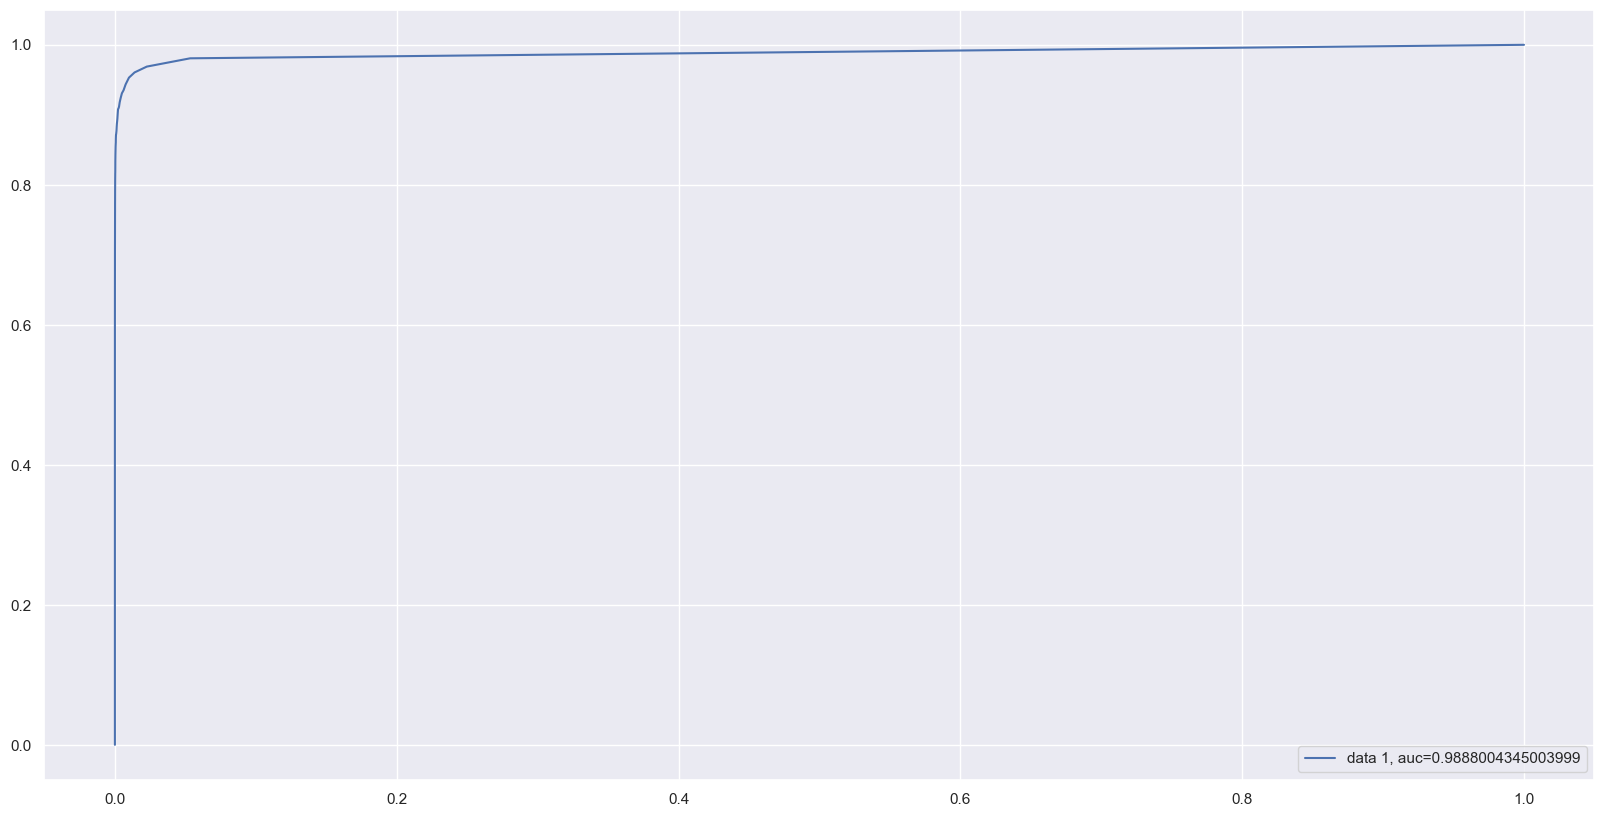

In [32]:
y_pred_proba = model1.predict_proba(x_test_data)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_data,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_data, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()